# Neural network implement of Logistic regression
In the previous sections, we use gradient descent to run the Logistic regression model. We mentioned some important concepts, like epochs, mini-batch, etc.. But we didn't implement them. In fact `sklearn` doesn't provide a very good tool to do all these computations. Hence we turn to another package for this model. We are going to use `keras` to build a Logistic regression model, and plot the "loss vs epochs" learning curves.

`keras` is high level Neural network library built upon `tensorflow`. We will talk about Neural network next Chapter. The package is installed along with `tensorflow`. You may follow the [instructions](https://www.tensorflow.org/install) to install it.

To use `keras` to implement logistic regression, we need the following modules: a `Sequential` model, a `Dense` layer. The model is organized as follows.

We still use the horse colic dataset as an example.

In [1]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Note that we need to perform normalization before throwing the data into the model. Here we use the `MinMaxScaler()` from `sklearn` package. The normalization layer in keras is a little bit more complicated and doesn't fit into situation.

In [2]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In the following code, we first set up the model, and then add one `Dense` layer. This `Dense` layer means that we would perform a linear transformation to the input, by the formula $\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_nx_n$. Then there are three arguments:

- `1`: means that there is only output.
- `activation='sigmoid'`: means that we will apply the `sigmoid` function after the linear transformation.
- `input_dim`: means the dimension of the input. Note that this dimension is the dimension of one individual data point. You don't take the size of the training set into consideration.

After building the basic architectal of the model, we need to speicify a few more arguments. In the `model.compile()` step, we have to input the `optimizer`, the loss function (which is the `binary_crossentropy` in our case) and the metrics to test the performance of the model (which is accuracy in our case).

The `optimizer` is how the parameters are updated. The best choice in general is `adam`. The default setting is `RMSprop` and the optimizer discussed in our lecture is `sgd`. We will use `adam` here, since the learning curve it produces looks better (for illustration).

Finally we could train the model. The argument is straightforward.

In [3]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))


Epoch 1/400


1/9 [==>...........................] - ETA: 3s - loss: 0.7297 - accuracy: 0.4000

9/9 [==============================] - 1s 24ms/step - loss: 0.6728 - accuracy: 0.5725 - val_loss: 0.7054 - val_accuracy: 0.4444


Epoch 2/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6039 - val_loss: 0.6909 - val_accuracy: 0.4889


Epoch 3/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.7333

9/9 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6196 - val_loss: 0.6800 - val_accuracy: 0.5111


Epoch 4/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.4667

9/9 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6471 - val_loss: 0.6689 - val_accuracy: 0.5333


Epoch 5/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6372 - accuracy: 0.6667

9/9 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6706 - val_loss: 0.6589 - val_accuracy: 0.5778


Epoch 6/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6086 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6667 - val_loss: 0.6510 - val_accuracy: 0.5778


Epoch 7/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6297 - accuracy: 0.6588 - val_loss: 0.6444 - val_accuracy: 0.5778


Epoch 8/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6376 - accuracy: 0.6000

9/9 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.6667 - val_loss: 0.6386 - val_accuracy: 0.6000


Epoch 9/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6233 - accuracy: 0.6706 - val_loss: 0.6335 - val_accuracy: 0.6444


Epoch 10/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6093 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.6627 - val_loss: 0.6291 - val_accuracy: 0.6444


Epoch 11/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5766 - accuracy: 0.7667

9/9 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.6588 - val_loss: 0.6254 - val_accuracy: 0.6667


Epoch 12/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6123 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.6588 - val_loss: 0.6223 - val_accuracy: 0.6667


Epoch 13/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5274 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.6588 - val_loss: 0.6189 - val_accuracy: 0.6667


Epoch 14/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6022 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6123 - accuracy: 0.6510 - val_loss: 0.6170 - val_accuracy: 0.6667


Epoch 15/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.6549 - val_loss: 0.6152 - val_accuracy: 0.6667


Epoch 16/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5629 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6093 - accuracy: 0.6588 - val_loss: 0.6130 - val_accuracy: 0.6889


Epoch 17/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6299 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6077 - accuracy: 0.6627 - val_loss: 0.6114 - val_accuracy: 0.6889


Epoch 18/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6194 - accuracy: 0.6333

9/9 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6627 - val_loss: 0.6101 - val_accuracy: 0.6889


Epoch 19/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5766 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.6627 - val_loss: 0.6083 - val_accuracy: 0.6889


Epoch 20/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.6627 - val_loss: 0.6066 - val_accuracy: 0.6889


Epoch 21/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5570 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.6706 - val_loss: 0.6051 - val_accuracy: 0.6889


Epoch 22/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6052 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6007 - accuracy: 0.6706 - val_loss: 0.6039 - val_accuracy: 0.6889


Epoch 23/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.6706 - val_loss: 0.6027 - val_accuracy: 0.6889


Epoch 24/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5982 - accuracy: 0.6784 - val_loss: 0.6016 - val_accuracy: 0.6889


Epoch 25/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5980 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.6784 - val_loss: 0.6005 - val_accuracy: 0.6889


Epoch 26/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5956 - accuracy: 0.6824 - val_loss: 0.5995 - val_accuracy: 0.6889


Epoch 27/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.6824 - val_loss: 0.5987 - val_accuracy: 0.6667


Epoch 28/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5932 - accuracy: 0.6745 - val_loss: 0.5971 - val_accuracy: 0.6667


Epoch 29/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6123 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.6745 - val_loss: 0.5962 - val_accuracy: 0.6667


Epoch 30/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5679 - accuracy: 0.6667

9/9 [==============================] - 0s 8ms/step - loss: 0.5907 - accuracy: 0.6784 - val_loss: 0.5955 - val_accuracy: 0.6667


Epoch 31/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5895 - accuracy: 0.6863 - val_loss: 0.5949 - val_accuracy: 0.6667


Epoch 32/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5483 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.6902 - val_loss: 0.5943 - val_accuracy: 0.6667


Epoch 33/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4965 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5873 - accuracy: 0.6902 - val_loss: 0.5932 - val_accuracy: 0.6667


Epoch 34/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5843 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5860 - accuracy: 0.6902 - val_loss: 0.5924 - val_accuracy: 0.6667


Epoch 35/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.6902 - val_loss: 0.5915 - val_accuracy: 0.6667


Epoch 36/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5494 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.6863 - val_loss: 0.5909 - val_accuracy: 0.6667


Epoch 37/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6351 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.6902 - val_loss: 0.5904 - val_accuracy: 0.6667


Epoch 38/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6302 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5815 - accuracy: 0.6863 - val_loss: 0.5894 - val_accuracy: 0.6667


Epoch 39/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6073 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5804 - accuracy: 0.6863 - val_loss: 0.5879 - val_accuracy: 0.6667


Epoch 40/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.6863 - val_loss: 0.5869 - val_accuracy: 0.6667


Epoch 41/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6306 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5783 - accuracy: 0.6902 - val_loss: 0.5862 - val_accuracy: 0.6667


Epoch 42/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5773 - accuracy: 0.6941 - val_loss: 0.5849 - val_accuracy: 0.6667


Epoch 43/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5793 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.6941 - val_loss: 0.5843 - val_accuracy: 0.6889


Epoch 44/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5774 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.6941 - val_loss: 0.5841 - val_accuracy: 0.6889


Epoch 45/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5425 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5742 - accuracy: 0.6941 - val_loss: 0.5841 - val_accuracy: 0.6889


Epoch 46/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5157 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.6980 - val_loss: 0.5834 - val_accuracy: 0.6889


Epoch 47/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5123 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5721 - accuracy: 0.6980 - val_loss: 0.5831 - val_accuracy: 0.6889


Epoch 48/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5824 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5711 - accuracy: 0.6980 - val_loss: 0.5830 - val_accuracy: 0.6889


Epoch 49/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6952 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7176 - val_loss: 0.5829 - val_accuracy: 0.7111


Epoch 50/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5691 - accuracy: 0.7216 - val_loss: 0.5817 - val_accuracy: 0.7111


Epoch 51/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5752 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7176 - val_loss: 0.5804 - val_accuracy: 0.7111


Epoch 52/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5973 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5673 - accuracy: 0.7098 - val_loss: 0.5798 - val_accuracy: 0.7111


Epoch 53/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6052 - accuracy: 0.7000

9/9 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7137 - val_loss: 0.5790 - val_accuracy: 0.7111


Epoch 54/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5182 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7176 - val_loss: 0.5791 - val_accuracy: 0.7111


Epoch 55/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.7176 - val_loss: 0.5782 - val_accuracy: 0.7111


Epoch 56/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5869 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5636 - accuracy: 0.7176 - val_loss: 0.5775 - val_accuracy: 0.7111


Epoch 57/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5140 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7176 - val_loss: 0.5766 - val_accuracy: 0.7111


Epoch 58/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.6667

9/9 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7216 - val_loss: 0.5764 - val_accuracy: 0.7111


Epoch 59/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5895 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7255 - val_loss: 0.5758 - val_accuracy: 0.7111


Epoch 60/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6336 - accuracy: 0.6333

9/9 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7255 - val_loss: 0.5754 - val_accuracy: 0.7111


Epoch 61/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5591 - accuracy: 0.7255 - val_loss: 0.5748 - val_accuracy: 0.7111


Epoch 62/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6390 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5582 - accuracy: 0.7294 - val_loss: 0.5742 - val_accuracy: 0.7111


Epoch 63/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5806 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.7294 - val_loss: 0.5736 - val_accuracy: 0.7111


Epoch 64/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5565 - accuracy: 0.7373 - val_loss: 0.5733 - val_accuracy: 0.7111


Epoch 65/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4733 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7373 - val_loss: 0.5732 - val_accuracy: 0.7111


Epoch 66/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.7412 - val_loss: 0.5731 - val_accuracy: 0.7111


Epoch 67/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.8000

9/9 [==============================] - 0s 3ms/step - loss: 0.5540 - accuracy: 0.7412 - val_loss: 0.5726 - val_accuracy: 0.7111


Epoch 68/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4919 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.7412 - val_loss: 0.5726 - val_accuracy: 0.7111


Epoch 69/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7490 - val_loss: 0.5721 - val_accuracy: 0.7111


Epoch 70/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5515 - accuracy: 0.7490 - val_loss: 0.5715 - val_accuracy: 0.7111


Epoch 71/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5777 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.7490 - val_loss: 0.5706 - val_accuracy: 0.7111


Epoch 72/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7490 - val_loss: 0.5696 - val_accuracy: 0.7111


Epoch 73/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7490 - val_loss: 0.5691 - val_accuracy: 0.7111


Epoch 74/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4992 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.7490 - val_loss: 0.5681 - val_accuracy: 0.7111


Epoch 75/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7490 - val_loss: 0.5679 - val_accuracy: 0.7111


Epoch 76/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5468 - accuracy: 0.7490 - val_loss: 0.5674 - val_accuracy: 0.7111


Epoch 77/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5538 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.7490 - val_loss: 0.5669 - val_accuracy: 0.6889


Epoch 78/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5454 - accuracy: 0.7490 - val_loss: 0.5663 - val_accuracy: 0.6889


Epoch 79/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5842 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.7529 - val_loss: 0.5666 - val_accuracy: 0.6889


Epoch 80/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.7569 - val_loss: 0.5657 - val_accuracy: 0.6889


Epoch 81/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.7569 - val_loss: 0.5659 - val_accuracy: 0.7111


Epoch 82/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.7569 - val_loss: 0.5657 - val_accuracy: 0.7111


Epoch 83/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5300 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5418 - accuracy: 0.7569 - val_loss: 0.5645 - val_accuracy: 0.7111


Epoch 84/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5410 - accuracy: 0.7569 - val_loss: 0.5641 - val_accuracy: 0.7111


Epoch 85/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5402 - accuracy: 0.7569 - val_loss: 0.5638 - val_accuracy: 0.7111


Epoch 86/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7333

9/9 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.7569 - val_loss: 0.5628 - val_accuracy: 0.7111


Epoch 87/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6507 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.7647 - val_loss: 0.5627 - val_accuracy: 0.7333


Epoch 88/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5571 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7647 - val_loss: 0.5629 - val_accuracy: 0.7333


Epoch 89/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6343 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5375 - accuracy: 0.7608 - val_loss: 0.5624 - val_accuracy: 0.7333


Epoch 90/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5368 - accuracy: 0.7608 - val_loss: 0.5620 - val_accuracy: 0.7333


Epoch 91/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5382 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5361 - accuracy: 0.7647 - val_loss: 0.5619 - val_accuracy: 0.7333


Epoch 92/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5815 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7647 - val_loss: 0.5617 - val_accuracy: 0.7333


Epoch 93/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.7686 - val_loss: 0.5620 - val_accuracy: 0.7333


Epoch 94/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5350 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.7686 - val_loss: 0.5615 - val_accuracy: 0.7333


Epoch 95/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4612 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7686 - val_loss: 0.5612 - val_accuracy: 0.7333


Epoch 96/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5328 - accuracy: 0.7686 - val_loss: 0.5615 - val_accuracy: 0.7333


Epoch 97/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4876 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5321 - accuracy: 0.7686 - val_loss: 0.5615 - val_accuracy: 0.7333


Epoch 98/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5492 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7686 - val_loss: 0.5612 - val_accuracy: 0.7333


Epoch 99/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5646 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.7647 - val_loss: 0.5614 - val_accuracy: 0.7333


Epoch 100/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5303 - accuracy: 0.7647 - val_loss: 0.5604 - val_accuracy: 0.7333


Epoch 101/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5943 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.7686 - val_loss: 0.5602 - val_accuracy: 0.7333


Epoch 102/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7686 - val_loss: 0.5592 - val_accuracy: 0.7333


Epoch 103/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5163 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.7686 - val_loss: 0.5587 - val_accuracy: 0.7333


Epoch 104/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.8000

9/9 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7686 - val_loss: 0.5591 - val_accuracy: 0.7556


Epoch 105/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.7725 - val_loss: 0.5599 - val_accuracy: 0.7556


Epoch 106/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7686 - val_loss: 0.5589 - val_accuracy: 0.7556


Epoch 107/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4683 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.7686 - val_loss: 0.5592 - val_accuracy: 0.7556


Epoch 108/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6376 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7647 - val_loss: 0.5591 - val_accuracy: 0.7556


Epoch 109/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5248 - accuracy: 0.7686 - val_loss: 0.5582 - val_accuracy: 0.7556


Epoch 110/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4793 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5243 - accuracy: 0.7686 - val_loss: 0.5578 - val_accuracy: 0.7556


Epoch 111/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5290 - accuracy: 0.8000

9/9 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7686 - val_loss: 0.5574 - val_accuracy: 0.7556


Epoch 112/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5464 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5231 - accuracy: 0.7647 - val_loss: 0.5572 - val_accuracy: 0.7556


Epoch 113/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7647 - val_loss: 0.5567 - val_accuracy: 0.7556


Epoch 114/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5884 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5220 - accuracy: 0.7647 - val_loss: 0.5565 - val_accuracy: 0.7556


Epoch 115/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5524 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.7647 - val_loss: 0.5563 - val_accuracy: 0.7556


Epoch 116/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5492 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.7647 - val_loss: 0.5560 - val_accuracy: 0.7556


Epoch 117/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4885 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5204 - accuracy: 0.7686 - val_loss: 0.5550 - val_accuracy: 0.7556


Epoch 118/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5717 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5198 - accuracy: 0.7725 - val_loss: 0.5550 - val_accuracy: 0.7556


Epoch 119/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5534 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.7686 - val_loss: 0.5543 - val_accuracy: 0.7556


Epoch 120/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5115 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5186 - accuracy: 0.7686 - val_loss: 0.5542 - val_accuracy: 0.7556


Epoch 121/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7725 - val_loss: 0.5538 - val_accuracy: 0.7556


Epoch 122/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.8333

9/9 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7647 - val_loss: 0.5547 - val_accuracy: 0.7556


Epoch 123/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7647 - val_loss: 0.5553 - val_accuracy: 0.7556


Epoch 124/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4313 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.5165 - accuracy: 0.7647 - val_loss: 0.5550 - val_accuracy: 0.7556


Epoch 125/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5438 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7686 - val_loss: 0.5543 - val_accuracy: 0.7556


Epoch 126/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7686 - val_loss: 0.5544 - val_accuracy: 0.7556


Epoch 127/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6073 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.7647 - val_loss: 0.5545 - val_accuracy: 0.7556


Epoch 128/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5145 - accuracy: 0.7647 - val_loss: 0.5537 - val_accuracy: 0.7556


Epoch 129/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7647 - val_loss: 0.5533 - val_accuracy: 0.7556


Epoch 130/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5135 - accuracy: 0.7647 - val_loss: 0.5532 - val_accuracy: 0.7556


Epoch 131/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7647 - val_loss: 0.5537 - val_accuracy: 0.7556


Epoch 132/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7686 - val_loss: 0.5533 - val_accuracy: 0.7556


Epoch 133/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4907 - accuracy: 0.8000

9/9 [==============================] - 0s 3ms/step - loss: 0.5120 - accuracy: 0.7686 - val_loss: 0.5531 - val_accuracy: 0.7556


Epoch 134/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5320 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5115 - accuracy: 0.7647 - val_loss: 0.5535 - val_accuracy: 0.7556


Epoch 135/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6093 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.5111 - accuracy: 0.7608 - val_loss: 0.5537 - val_accuracy: 0.7333


Epoch 136/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4668 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5105 - accuracy: 0.7608 - val_loss: 0.5531 - val_accuracy: 0.7556


Epoch 137/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5214 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7608 - val_loss: 0.5531 - val_accuracy: 0.7556


Epoch 138/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.7647 - val_loss: 0.5534 - val_accuracy: 0.7333


Epoch 139/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5589 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7647 - val_loss: 0.5533 - val_accuracy: 0.7333


Epoch 140/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4826 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.7647 - val_loss: 0.5533 - val_accuracy: 0.7333


Epoch 141/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5223 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7608 - val_loss: 0.5528 - val_accuracy: 0.7333


Epoch 142/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.7647 - val_loss: 0.5522 - val_accuracy: 0.7333


Epoch 143/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6174 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.7647 - val_loss: 0.5518 - val_accuracy: 0.7333


Epoch 144/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.7686 - val_loss: 0.5511 - val_accuracy: 0.7556


Epoch 145/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4771 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5063 - accuracy: 0.7686 - val_loss: 0.5508 - val_accuracy: 0.7556


Epoch 146/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6972 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7686 - val_loss: 0.5512 - val_accuracy: 0.7333


Epoch 147/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5054 - accuracy: 0.7647 - val_loss: 0.5508 - val_accuracy: 0.7333


Epoch 148/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5049 - accuracy: 0.7608 - val_loss: 0.5507 - val_accuracy: 0.7333


Epoch 149/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5118 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5045 - accuracy: 0.7608 - val_loss: 0.5510 - val_accuracy: 0.7333


Epoch 150/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.7608 - val_loss: 0.5505 - val_accuracy: 0.7333


Epoch 151/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5027 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5037 - accuracy: 0.7608 - val_loss: 0.5507 - val_accuracy: 0.7333


Epoch 152/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7608 - val_loss: 0.5502 - val_accuracy: 0.7333


Epoch 153/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5026 - accuracy: 0.7569 - val_loss: 0.5497 - val_accuracy: 0.7333


Epoch 154/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6053 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7569 - val_loss: 0.5497 - val_accuracy: 0.7333


Epoch 155/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6288 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5018 - accuracy: 0.7569 - val_loss: 0.5492 - val_accuracy: 0.7333


Epoch 156/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5022 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7608 - val_loss: 0.5485 - val_accuracy: 0.7333


Epoch 157/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.7608 - val_loss: 0.5478 - val_accuracy: 0.7556


Epoch 158/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.5006 - accuracy: 0.7608 - val_loss: 0.5484 - val_accuracy: 0.7333


Epoch 159/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4973 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5001 - accuracy: 0.7608 - val_loss: 0.5481 - val_accuracy: 0.7333


Epoch 160/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4997 - accuracy: 0.7647 - val_loss: 0.5478 - val_accuracy: 0.7333


Epoch 161/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4945 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7647 - val_loss: 0.5476 - val_accuracy: 0.7333


Epoch 162/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4789 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7647 - val_loss: 0.5474 - val_accuracy: 0.7333


Epoch 163/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5140 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4984 - accuracy: 0.7647 - val_loss: 0.5472 - val_accuracy: 0.7333


Epoch 164/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4980 - accuracy: 0.7686 - val_loss: 0.5470 - val_accuracy: 0.7333


Epoch 165/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.7686 - val_loss: 0.5471 - val_accuracy: 0.7333


Epoch 166/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4971 - accuracy: 0.7725 - val_loss: 0.5473 - val_accuracy: 0.7333


Epoch 167/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4539 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4967 - accuracy: 0.7765 - val_loss: 0.5475 - val_accuracy: 0.7333


Epoch 168/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5040 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4963 - accuracy: 0.7725 - val_loss: 0.5474 - val_accuracy: 0.7333


Epoch 169/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4960 - accuracy: 0.7765 - val_loss: 0.5467 - val_accuracy: 0.7333


Epoch 170/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5460 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4957 - accuracy: 0.7804 - val_loss: 0.5475 - val_accuracy: 0.7333


Epoch 171/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5167 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7765 - val_loss: 0.5475 - val_accuracy: 0.7333


Epoch 172/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4947 - accuracy: 0.7804 - val_loss: 0.5476 - val_accuracy: 0.7333


Epoch 173/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4516 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4944 - accuracy: 0.7804 - val_loss: 0.5475 - val_accuracy: 0.7333


Epoch 174/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6011 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4940 - accuracy: 0.7804 - val_loss: 0.5480 - val_accuracy: 0.7333


Epoch 175/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4512 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.7804 - val_loss: 0.5486 - val_accuracy: 0.7333


Epoch 176/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6130 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4933 - accuracy: 0.7765 - val_loss: 0.5478 - val_accuracy: 0.7333


Epoch 177/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4848 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.7765 - val_loss: 0.5481 - val_accuracy: 0.7333


Epoch 178/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4264 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.7765 - val_loss: 0.5483 - val_accuracy: 0.7333


Epoch 179/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7765 - val_loss: 0.5479 - val_accuracy: 0.7333


Epoch 180/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.7765 - val_loss: 0.5473 - val_accuracy: 0.7333


Epoch 181/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.7765 - val_loss: 0.5473 - val_accuracy: 0.7333


Epoch 182/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4349 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7765 - val_loss: 0.5468 - val_accuracy: 0.7333


Epoch 183/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5014 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.7765 - val_loss: 0.5456 - val_accuracy: 0.7333


Epoch 184/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4789 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.7804 - val_loss: 0.5450 - val_accuracy: 0.7333


Epoch 185/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7804 - val_loss: 0.5439 - val_accuracy: 0.7333


Epoch 186/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.4895 - accuracy: 0.7804 - val_loss: 0.5446 - val_accuracy: 0.7333


Epoch 187/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7804 - val_loss: 0.5443 - val_accuracy: 0.7333


Epoch 188/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.7843 - val_loss: 0.5435 - val_accuracy: 0.7333


Epoch 189/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4439 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4886 - accuracy: 0.7804 - val_loss: 0.5446 - val_accuracy: 0.7333


Epoch 190/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8667

9/9 [==============================] - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7804 - val_loss: 0.5443 - val_accuracy: 0.7333


Epoch 191/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7804 - val_loss: 0.5441 - val_accuracy: 0.7333


Epoch 192/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.7882 - val_loss: 0.5436 - val_accuracy: 0.7333


Epoch 193/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5632 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4869 - accuracy: 0.7922 - val_loss: 0.5445 - val_accuracy: 0.7111


Epoch 194/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4979 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7843 - val_loss: 0.5447 - val_accuracy: 0.7111


Epoch 195/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4315 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7843 - val_loss: 0.5441 - val_accuracy: 0.7111


Epoch 196/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4929 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.7843 - val_loss: 0.5442 - val_accuracy: 0.7111


Epoch 197/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4810 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.7882 - val_loss: 0.5445 - val_accuracy: 0.7111


Epoch 198/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.7843 - val_loss: 0.5446 - val_accuracy: 0.7111


Epoch 199/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.7843 - val_loss: 0.5440 - val_accuracy: 0.7111


Epoch 200/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4805 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.7882 - val_loss: 0.5439 - val_accuracy: 0.7111


Epoch 201/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4768 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.7882 - val_loss: 0.5439 - val_accuracy: 0.7111


Epoch 202/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6561 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.7922 - val_loss: 0.5432 - val_accuracy: 0.7111


Epoch 203/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4669 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7882 - val_loss: 0.5440 - val_accuracy: 0.7111


Epoch 204/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4589 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4832 - accuracy: 0.7922 - val_loss: 0.5438 - val_accuracy: 0.7111


Epoch 205/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5019 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7922 - val_loss: 0.5434 - val_accuracy: 0.7111


Epoch 206/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.7961 - val_loss: 0.5427 - val_accuracy: 0.7111


Epoch 207/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4703 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4822 - accuracy: 0.7961 - val_loss: 0.5428 - val_accuracy: 0.7111


Epoch 208/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5649 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4818 - accuracy: 0.7922 - val_loss: 0.5432 - val_accuracy: 0.7111


Epoch 209/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.7882 - val_loss: 0.5435 - val_accuracy: 0.6889


Epoch 210/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4811 - accuracy: 0.7882 - val_loss: 0.5432 - val_accuracy: 0.6889


Epoch 211/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4908 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.7922 - val_loss: 0.5422 - val_accuracy: 0.7111


Epoch 212/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.8000 - val_loss: 0.5418 - val_accuracy: 0.7111


Epoch 213/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3836 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.8000 - val_loss: 0.5422 - val_accuracy: 0.6889


Epoch 214/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6002 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.7961 - val_loss: 0.5426 - val_accuracy: 0.6889


Epoch 215/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5497 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7961 - val_loss: 0.5421 - val_accuracy: 0.6889


Epoch 216/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.8000 - val_loss: 0.5415 - val_accuracy: 0.6889


Epoch 217/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4210 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.7961 - val_loss: 0.5417 - val_accuracy: 0.6889


Epoch 218/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.7667



9/9 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7961 - val_loss: 0.5419 - val_accuracy: 0.6889


Epoch 219/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.7961 - val_loss: 0.5420 - val_accuracy: 0.6889


Epoch 220/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7961 - val_loss: 0.5422 - val_accuracy: 0.6889


Epoch 221/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7922 - val_loss: 0.5424 - val_accuracy: 0.6889


Epoch 222/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.7961 - val_loss: 0.5414 - val_accuracy: 0.6889


Epoch 223/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4630 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7961 - val_loss: 0.5415 - val_accuracy: 0.6889


Epoch 224/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6036 - accuracy: 0.6333



9/9 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.7922 - val_loss: 0.5425 - val_accuracy: 0.6889


Epoch 225/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4056 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7961 - val_loss: 0.5420 - val_accuracy: 0.6889


Epoch 226/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4978 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7961 - val_loss: 0.5418 - val_accuracy: 0.6889


Epoch 227/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5262 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7961 - val_loss: 0.5414 - val_accuracy: 0.6889


Epoch 228/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4755 - accuracy: 0.7961 - val_loss: 0.5416 - val_accuracy: 0.6889


Epoch 229/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3625 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7961 - val_loss: 0.5406 - val_accuracy: 0.6889


Epoch 230/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5290 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.7961 - val_loss: 0.5410 - val_accuracy: 0.6889


Epoch 231/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4654 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7961 - val_loss: 0.5408 - val_accuracy: 0.6889


Epoch 232/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4799 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.7961 - val_loss: 0.5408 - val_accuracy: 0.6889


Epoch 233/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7961 - val_loss: 0.5405 - val_accuracy: 0.6889


Epoch 234/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5551 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7961 - val_loss: 0.5404 - val_accuracy: 0.6889


Epoch 235/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4734 - accuracy: 0.7961 - val_loss: 0.5408 - val_accuracy: 0.6889


Epoch 236/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5348 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.7961 - val_loss: 0.5415 - val_accuracy: 0.6889


Epoch 237/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.7961 - val_loss: 0.5416 - val_accuracy: 0.6889


Epoch 238/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7961 - val_loss: 0.5414 - val_accuracy: 0.6889


Epoch 239/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7961 - val_loss: 0.5420 - val_accuracy: 0.6889


Epoch 240/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5691 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7961 - val_loss: 0.5418 - val_accuracy: 0.6889


Epoch 241/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.7961 - val_loss: 0.5415 - val_accuracy: 0.6889


Epoch 242/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5231 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7961 - val_loss: 0.5416 - val_accuracy: 0.6889


Epoch 243/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3321 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.7961 - val_loss: 0.5401 - val_accuracy: 0.6889


Epoch 244/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3937 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7961 - val_loss: 0.5405 - val_accuracy: 0.6889


Epoch 245/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.7961 - val_loss: 0.5406 - val_accuracy: 0.6889


Epoch 246/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7961 - val_loss: 0.5405 - val_accuracy: 0.6889


Epoch 247/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4791 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7961 - val_loss: 0.5404 - val_accuracy: 0.6889


Epoch 248/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7961 - val_loss: 0.5402 - val_accuracy: 0.6889


Epoch 249/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7961 - val_loss: 0.5405 - val_accuracy: 0.6889


Epoch 250/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4989 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.7961 - val_loss: 0.5409 - val_accuracy: 0.6889


Epoch 251/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7961 - val_loss: 0.5398 - val_accuracy: 0.6889


Epoch 252/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.7961 - val_loss: 0.5395 - val_accuracy: 0.6889


Epoch 253/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4323 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.7961 - val_loss: 0.5398 - val_accuracy: 0.6889


Epoch 254/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5465 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7961 - val_loss: 0.5394 - val_accuracy: 0.6889


Epoch 255/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4728 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7961 - val_loss: 0.5396 - val_accuracy: 0.6889


Epoch 256/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4729 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.7961 - val_loss: 0.5394 - val_accuracy: 0.6889


Epoch 257/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7961 - val_loss: 0.5394 - val_accuracy: 0.6889


Epoch 258/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5194 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7961 - val_loss: 0.5393 - val_accuracy: 0.6889


Epoch 259/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7961 - val_loss: 0.5401 - val_accuracy: 0.6889


Epoch 260/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7922 - val_loss: 0.5412 - val_accuracy: 0.6889


Epoch 261/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5193 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.7922 - val_loss: 0.5409 - val_accuracy: 0.6889


Epoch 262/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4403 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.7922 - val_loss: 0.5400 - val_accuracy: 0.6889


Epoch 263/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4346 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4657 - accuracy: 0.7922 - val_loss: 0.5396 - val_accuracy: 0.6889


Epoch 264/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4862 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.7922 - val_loss: 0.5387 - val_accuracy: 0.6889


Epoch 265/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5551 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.7922 - val_loss: 0.5381 - val_accuracy: 0.6889


Epoch 266/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7922 - val_loss: 0.5380 - val_accuracy: 0.6889


Epoch 267/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4967 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.7961 - val_loss: 0.5375 - val_accuracy: 0.6889


Epoch 268/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6045 - accuracy: 0.7333



9/9 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7961 - val_loss: 0.5372 - val_accuracy: 0.6889


Epoch 269/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4641 - accuracy: 0.7961 - val_loss: 0.5368 - val_accuracy: 0.6889


Epoch 270/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4099 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4641 - accuracy: 0.7961 - val_loss: 0.5366 - val_accuracy: 0.6889


Epoch 271/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.7961 - val_loss: 0.5373 - val_accuracy: 0.6889


Epoch 272/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.7961 - val_loss: 0.5368 - val_accuracy: 0.6889


Epoch 273/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4631 - accuracy: 0.7961 - val_loss: 0.5374 - val_accuracy: 0.6889


Epoch 274/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5307 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.7922 - val_loss: 0.5377 - val_accuracy: 0.6889


Epoch 275/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.8000 - val_loss: 0.5370 - val_accuracy: 0.6889


Epoch 276/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.7961 - val_loss: 0.5374 - val_accuracy: 0.6889


Epoch 277/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.7961 - val_loss: 0.5374 - val_accuracy: 0.7111


Epoch 278/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.8000 - val_loss: 0.5369 - val_accuracy: 0.6889


Epoch 279/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8000 - val_loss: 0.5364 - val_accuracy: 0.6889


Epoch 280/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.8000 - val_loss: 0.5371 - val_accuracy: 0.7111


Epoch 281/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.7961 - val_loss: 0.5376 - val_accuracy: 0.7111


Epoch 282/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4691 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7961 - val_loss: 0.5371 - val_accuracy: 0.7111


Epoch 283/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4916 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4606 - accuracy: 0.7961 - val_loss: 0.5378 - val_accuracy: 0.7111


Epoch 284/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.7961 - val_loss: 0.5382 - val_accuracy: 0.7111


Epoch 285/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.7961 - val_loss: 0.5381 - val_accuracy: 0.7111


Epoch 286/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.7961 - val_loss: 0.5377 - val_accuracy: 0.7111


Epoch 287/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4476 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.7961 - val_loss: 0.5369 - val_accuracy: 0.7111


Epoch 288/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4594 - accuracy: 0.7961 - val_loss: 0.5366 - val_accuracy: 0.7111


Epoch 289/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4353 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.7961 - val_loss: 0.5366 - val_accuracy: 0.7111


Epoch 290/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.7961 - val_loss: 0.5365 - val_accuracy: 0.7111


Epoch 291/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4213 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.7961 - val_loss: 0.5363 - val_accuracy: 0.7111


Epoch 292/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8000 - val_loss: 0.5362 - val_accuracy: 0.7111


Epoch 293/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8000 - val_loss: 0.5357 - val_accuracy: 0.7111


Epoch 294/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3964 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.8000 - val_loss: 0.5353 - val_accuracy: 0.7111


Epoch 295/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5470 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.8000 - val_loss: 0.5356 - val_accuracy: 0.7111


Epoch 296/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4571 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8000 - val_loss: 0.5354 - val_accuracy: 0.7111


Epoch 297/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.8000 - val_loss: 0.5360 - val_accuracy: 0.7111


Epoch 298/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5820 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.8000 - val_loss: 0.5355 - val_accuracy: 0.7111


Epoch 299/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4773 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4568 - accuracy: 0.8039 - val_loss: 0.5353 - val_accuracy: 0.7111


Epoch 300/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4963 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.8039 - val_loss: 0.5350 - val_accuracy: 0.7111


Epoch 301/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4246 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.8039 - val_loss: 0.5350 - val_accuracy: 0.7111


Epoch 302/400
1/9 [==>...........................] - ETA: 0s - loss: 0.2915 - accuracy: 0.9667

9/9 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8039 - val_loss: 0.5345 - val_accuracy: 0.7111


Epoch 303/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4727 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.8039 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 304/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5471 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4557 - accuracy: 0.8039 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 305/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4555 - accuracy: 0.8039 - val_loss: 0.5347 - val_accuracy: 0.7111


Epoch 306/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4263 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4552 - accuracy: 0.8039 - val_loss: 0.5345 - val_accuracy: 0.7111


Epoch 307/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.8039 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 308/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8039 - val_loss: 0.5349 - val_accuracy: 0.7111


Epoch 309/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8039 - val_loss: 0.5345 - val_accuracy: 0.7111


Epoch 310/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5414 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.8039 - val_loss: 0.5350 - val_accuracy: 0.7111


Epoch 311/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.8039 - val_loss: 0.5347 - val_accuracy: 0.7111


Epoch 312/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.8039 - val_loss: 0.5344 - val_accuracy: 0.7111


Epoch 313/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4705 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4539 - accuracy: 0.8039 - val_loss: 0.5355 - val_accuracy: 0.7111


Epoch 314/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4917 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.8000 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 315/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4739 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.8039 - val_loss: 0.5337 - val_accuracy: 0.7111


Epoch 316/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3669 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4531 - accuracy: 0.8000 - val_loss: 0.5347 - val_accuracy: 0.7111


Epoch 317/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3716 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4529 - accuracy: 0.8039 - val_loss: 0.5344 - val_accuracy: 0.7111


Epoch 318/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4970 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4526 - accuracy: 0.8000 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 319/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.9667

9/9 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8000 - val_loss: 0.5340 - val_accuracy: 0.7111


Epoch 320/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3393 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4522 - accuracy: 0.8000 - val_loss: 0.5346 - val_accuracy: 0.7111


Epoch 321/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3711 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.8039 - val_loss: 0.5342 - val_accuracy: 0.7111


Epoch 322/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3890 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.8039 - val_loss: 0.5342 - val_accuracy: 0.7111


Epoch 323/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4667 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.8039 - val_loss: 0.5338 - val_accuracy: 0.7111


Epoch 324/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.8039 - val_loss: 0.5333 - val_accuracy: 0.7111


Epoch 325/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8039 - val_loss: 0.5333 - val_accuracy: 0.7111


Epoch 326/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5597 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8039 - val_loss: 0.5331 - val_accuracy: 0.7111


Epoch 327/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8039 - val_loss: 0.5329 - val_accuracy: 0.7111


Epoch 328/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3182 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.8039 - val_loss: 0.5327 - val_accuracy: 0.7111


Epoch 329/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4045 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.8039 - val_loss: 0.5336 - val_accuracy: 0.7111


Epoch 330/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4499 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8039 - val_loss: 0.5338 - val_accuracy: 0.7111


Epoch 331/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5648 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.8039 - val_loss: 0.5340 - val_accuracy: 0.7111


Epoch 332/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4496 - accuracy: 0.8078 - val_loss: 0.5343 - val_accuracy: 0.7111


Epoch 333/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.8039 - val_loss: 0.5344 - val_accuracy: 0.7111


Epoch 334/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.8039 - val_loss: 0.5349 - val_accuracy: 0.7111


Epoch 335/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4491 - accuracy: 0.8078 - val_loss: 0.5355 - val_accuracy: 0.7111


Epoch 336/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.8078 - val_loss: 0.5353 - val_accuracy: 0.7111


Epoch 337/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6786 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.8078 - val_loss: 0.5348 - val_accuracy: 0.7111


Epoch 338/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.8078 - val_loss: 0.5345 - val_accuracy: 0.7111


Epoch 339/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8078 - val_loss: 0.5341 - val_accuracy: 0.7111


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.8039 - val_loss: 0.5336 - val_accuracy: 0.7111


Epoch 341/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3940 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4478 - accuracy: 0.8078 - val_loss: 0.5331 - val_accuracy: 0.7111


Epoch 342/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8078 - val_loss: 0.5329 - val_accuracy: 0.7111


Epoch 343/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4475 - accuracy: 0.8078 - val_loss: 0.5321 - val_accuracy: 0.7111


Epoch 344/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4898 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4472 - accuracy: 0.8078 - val_loss: 0.5326 - val_accuracy: 0.7111


Epoch 345/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.8078 - val_loss: 0.5330 - val_accuracy: 0.7111


Epoch 346/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.8078 - val_loss: 0.5338 - val_accuracy: 0.7111


Epoch 347/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6470 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8078 - val_loss: 0.5339 - val_accuracy: 0.7111


Epoch 348/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3771 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.8078 - val_loss: 0.5336 - val_accuracy: 0.7111


Epoch 349/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.8078 - val_loss: 0.5342 - val_accuracy: 0.7111


Epoch 350/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.8078 - val_loss: 0.5334 - val_accuracy: 0.7111


Epoch 351/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4846 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.8078 - val_loss: 0.5333 - val_accuracy: 0.7111


Epoch 352/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5244 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.8078 - val_loss: 0.5332 - val_accuracy: 0.7111


Epoch 353/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8078 - val_loss: 0.5338 - val_accuracy: 0.7333


Epoch 354/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8078 - val_loss: 0.5337 - val_accuracy: 0.7333


Epoch 355/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3315 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8078 - val_loss: 0.5331 - val_accuracy: 0.7111


Epoch 356/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4450 - accuracy: 0.8078 - val_loss: 0.5340 - val_accuracy: 0.7333


Epoch 357/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8078 - val_loss: 0.5334 - val_accuracy: 0.7333


Epoch 358/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4107 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8078 - val_loss: 0.5327 - val_accuracy: 0.7333


Epoch 359/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3938 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.8078 - val_loss: 0.5333 - val_accuracy: 0.7333


Epoch 360/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4395 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.8078 - val_loss: 0.5334 - val_accuracy: 0.7333


Epoch 361/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4439 - accuracy: 0.8039 - val_loss: 0.5339 - val_accuracy: 0.7333


Epoch 362/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.8039 - val_loss: 0.5342 - val_accuracy: 0.7333


Epoch 363/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5290 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.8078 - val_loss: 0.5344 - val_accuracy: 0.7333


Epoch 364/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4435 - accuracy: 0.8078 - val_loss: 0.5350 - val_accuracy: 0.7333


Epoch 365/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5398 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.8118 - val_loss: 0.5347 - val_accuracy: 0.7333


Epoch 366/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.8078 - val_loss: 0.5344 - val_accuracy: 0.7333


Epoch 367/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4429 - accuracy: 0.8078 - val_loss: 0.5341 - val_accuracy: 0.7333


Epoch 368/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8039 - val_loss: 0.5329 - val_accuracy: 0.7333


Epoch 369/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8078 - val_loss: 0.5319 - val_accuracy: 0.7333


Epoch 370/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3672 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8118 - val_loss: 0.5313 - val_accuracy: 0.7333


Epoch 371/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4076 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8118 - val_loss: 0.5319 - val_accuracy: 0.7333


Epoch 372/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8078 - val_loss: 0.5314 - val_accuracy: 0.7333


Epoch 373/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8078 - val_loss: 0.5311 - val_accuracy: 0.7333


Epoch 374/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6651 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.8078 - val_loss: 0.5308 - val_accuracy: 0.7333


Epoch 375/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5209 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 0.8078 - val_loss: 0.5310 - val_accuracy: 0.7333


Epoch 376/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.8078 - val_loss: 0.5311 - val_accuracy: 0.7333


Epoch 377/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3731 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.8078 - val_loss: 0.5303 - val_accuracy: 0.7333


Epoch 378/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4410 - accuracy: 0.8078 - val_loss: 0.5309 - val_accuracy: 0.7333


Epoch 379/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4323 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4407 - accuracy: 0.8078 - val_loss: 0.5314 - val_accuracy: 0.7333


Epoch 380/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.8078 - val_loss: 0.5305 - val_accuracy: 0.7333


Epoch 381/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4702 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4404 - accuracy: 0.8078 - val_loss: 0.5303 - val_accuracy: 0.7333


Epoch 382/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.8078 - val_loss: 0.5303 - val_accuracy: 0.7333


Epoch 383/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3673 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.8078 - val_loss: 0.5307 - val_accuracy: 0.7333


Epoch 384/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8078 - val_loss: 0.5305 - val_accuracy: 0.7333


Epoch 385/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.8078 - val_loss: 0.5305 - val_accuracy: 0.7333


Epoch 386/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.8039 - val_loss: 0.5299 - val_accuracy: 0.7333


Epoch 387/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8078 - val_loss: 0.5301 - val_accuracy: 0.7333


Epoch 388/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8078 - val_loss: 0.5303 - val_accuracy: 0.7333


Epoch 389/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8118 - val_loss: 0.5303 - val_accuracy: 0.7333


Epoch 390/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4079 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8078 - val_loss: 0.5313 - val_accuracy: 0.7333


Epoch 391/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5170 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.8078 - val_loss: 0.5314 - val_accuracy: 0.7333


Epoch 392/400
1/9 [==>...........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4384 - accuracy: 0.8078 - val_loss: 0.5307 - val_accuracy: 0.7333


Epoch 393/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4383 - accuracy: 0.8078 - val_loss: 0.5311 - val_accuracy: 0.7333


Epoch 394/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.8078 - val_loss: 0.5310 - val_accuracy: 0.7333


Epoch 395/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.8078 - val_loss: 0.5307 - val_accuracy: 0.7333


Epoch 396/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5611 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4377 - accuracy: 0.8078 - val_loss: 0.5305 - val_accuracy: 0.7333


Epoch 397/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.8078 - val_loss: 0.5307 - val_accuracy: 0.7333


Epoch 398/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4373 - accuracy: 0.8078 - val_loss: 0.5304 - val_accuracy: 0.7333


Epoch 399/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5412 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4373 - accuracy: 0.8078 - val_loss: 0.5308 - val_accuracy: 0.7333


Epoch 400/400
1/9 [==>...........................] - ETA: 0s - loss: 0.4920 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4370 - accuracy: 0.8078 - val_loss: 0.5303 - val_accuracy: 0.7333


Note that we assign the output of `model.fit()` to a variable `hist`. The infomation about this training process is recorded inside. We will extract those information.

In [4]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

We now could plot the learning curve (loss vs epochs) and the learning curve (accuracy vs epochs).

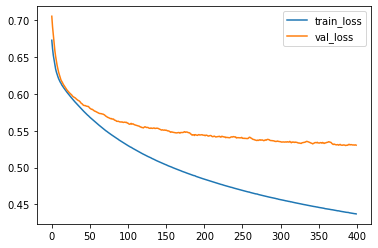

In [5]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

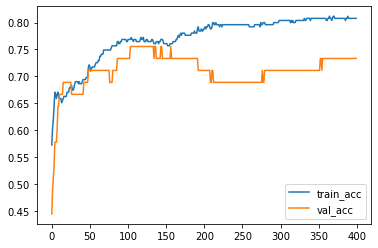

In [6]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

## Regularization
To apply regularization, we just need to modify the layer we added to the model. The argument is `kernel_regularizer`. We would like to set it to be `keras.regularizers.L2(alpha)`, where `alpha` is the regularization strength.

In [7]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))


Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.8639 - accuracy: 0.5000

9/9 [==============================] - 0s 22ms/step - loss: 1.8751 - accuracy: 0.4118 - val_loss: 1.7610 - val_accuracy: 0.2889


Epoch 2/400
1/9 [==>...........................] - ETA: 0s - loss: 1.6876 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 1.6330 - accuracy: 0.4078 - val_loss: 1.5397 - val_accuracy: 0.3333


Epoch 3/400
1/9 [==>...........................] - ETA: 0s - loss: 1.5361 - accuracy: 0.3667

9/9 [==============================] - 0s 4ms/step - loss: 1.4418 - accuracy: 0.4039 - val_loss: 1.3636 - val_accuracy: 0.4222


Epoch 4/400
1/9 [==>...........................] - ETA: 0s - loss: 1.3257 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 1.2901 - accuracy: 0.4118 - val_loss: 1.2249 - val_accuracy: 0.4889


Epoch 5/400
1/9 [==>...........................] - ETA: 0s - loss: 1.2234 - accuracy: 0.3667

9/9 [==============================] - 0s 4ms/step - loss: 1.1703 - accuracy: 0.4235 - val_loss: 1.1142 - val_accuracy: 0.5333


Epoch 6/400
1/9 [==>...........................] - ETA: 0s - loss: 1.1638 - accuracy: 0.2667

9/9 [==============================] - 0s 4ms/step - loss: 1.0744 - accuracy: 0.4353 - val_loss: 1.0256 - val_accuracy: 0.5111


Epoch 7/400
1/9 [==>...........................] - ETA: 0s - loss: 1.0341 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.9974 - accuracy: 0.4706 - val_loss: 0.9551 - val_accuracy: 0.5778


Epoch 8/400
1/9 [==>...........................] - ETA: 0s - loss: 0.9630 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.9359 - accuracy: 0.5137 - val_loss: 0.8969 - val_accuracy: 0.6000


Epoch 9/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8713 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.8854 - accuracy: 0.5529 - val_loss: 0.8496 - val_accuracy: 0.6000


Epoch 10/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8563 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.8439 - accuracy: 0.5843 - val_loss: 0.8115 - val_accuracy: 0.6222


Epoch 11/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8117 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.8108 - accuracy: 0.6196 - val_loss: 0.7803 - val_accuracy: 0.6444


Epoch 12/400
1/9 [==>...........................] - ETA: 0s - loss: 0.8036 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.6235 - val_loss: 0.7547 - val_accuracy: 0.6889


Epoch 13/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7941 - accuracy: 0.5333



9/9 [==============================] - 0s 4ms/step - loss: 0.7608 - accuracy: 0.6275 - val_loss: 0.7336 - val_accuracy: 0.7111


Epoch 14/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7969 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.7425 - accuracy: 0.6275 - val_loss: 0.7165 - val_accuracy: 0.7111


Epoch 15/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.7273 - accuracy: 0.6275 - val_loss: 0.7025 - val_accuracy: 0.6889


Epoch 16/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.7147 - accuracy: 0.6275 - val_loss: 0.6907 - val_accuracy: 0.6889


Epoch 17/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6983 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.6275 - val_loss: 0.6810 - val_accuracy: 0.6889


Epoch 18/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6958 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.6275 - val_loss: 0.6733 - val_accuracy: 0.6889


Epoch 19/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6697 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.6275 - val_loss: 0.6666 - val_accuracy: 0.6889


Epoch 20/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7082 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.6275 - val_loss: 0.6607 - val_accuracy: 0.6889


Epoch 21/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6956 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6275 - val_loss: 0.6557 - val_accuracy: 0.6889


Epoch 22/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7295 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.6275 - val_loss: 0.6516 - val_accuracy: 0.6889


Epoch 23/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6964 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.6275 - val_loss: 0.6486 - val_accuracy: 0.6889


Epoch 24/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6397 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6275 - val_loss: 0.6464 - val_accuracy: 0.6889


Epoch 25/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.6275 - val_loss: 0.6439 - val_accuracy: 0.6889


Epoch 26/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7075 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.6275 - val_loss: 0.6419 - val_accuracy: 0.6889


Epoch 27/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7204 - accuracy: 0.5000

9/9 [==============================] - 0s 20ms/step - loss: 0.6617 - accuracy: 0.6275 - val_loss: 0.6402 - val_accuracy: 0.6889


Epoch 28/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6625 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6275 - val_loss: 0.6393 - val_accuracy: 0.6889


Epoch 29/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6371 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6275 - val_loss: 0.6382 - val_accuracy: 0.6889


Epoch 30/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6190 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6275 - val_loss: 0.6375 - val_accuracy: 0.6889


Epoch 31/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.6275 - val_loss: 0.6370 - val_accuracy: 0.6889


Epoch 32/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6328 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.6275 - val_loss: 0.6360 - val_accuracy: 0.6889


Epoch 33/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6718 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6275 - val_loss: 0.6356 - val_accuracy: 0.6889


Epoch 34/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.6275 - val_loss: 0.6351 - val_accuracy: 0.6889


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6275 - val_loss: 0.6347 - val_accuracy: 0.6889


Epoch 36/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6275 - val_loss: 0.6344 - val_accuracy: 0.6889


Epoch 37/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7622 - accuracy: 0.3667

9/9 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6275 - val_loss: 0.6337 - val_accuracy: 0.6889


Epoch 38/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6547 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.6275 - val_loss: 0.6334 - val_accuracy: 0.6889


Epoch 39/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7249 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6330 - val_accuracy: 0.6889


Epoch 40/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6950 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6325 - val_accuracy: 0.6889


Epoch 41/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6275 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 42/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 43/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 45/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6314 - val_accuracy: 0.6889


Epoch 46/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6863 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 47/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 48/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7229 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6312 - val_accuracy: 0.6889


Epoch 49/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6311 - val_accuracy: 0.6889


Epoch 50/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7021 - accuracy: 0.5000



9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 51/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 52/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6630 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 53/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 54/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6425 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 55/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6045 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 56/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 57/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6374 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6303 - val_accuracy: 0.6889


Epoch 58/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6301 - val_accuracy: 0.6889


Epoch 59/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6050 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6275 - val_loss: 0.6301 - val_accuracy: 0.6889


Epoch 60/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5894 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6299 - val_accuracy: 0.6889


Epoch 61/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6236 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 62/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 63/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6294 - val_accuracy: 0.6889


Epoch 64/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 65/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6213 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6299 - val_accuracy: 0.6889


Epoch 66/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6301 - val_accuracy: 0.6889


Epoch 67/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5906 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 68/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5988 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6299 - val_accuracy: 0.6889


Epoch 69/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 70/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 71/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6885 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 72/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6356 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 73/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 74/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7561 - accuracy: 0.3667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 75/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6291 - val_accuracy: 0.6889


Epoch 76/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6351 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 77/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5935 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 78/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7029 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 79/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6076 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6289 - val_accuracy: 0.6889


Epoch 80/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6298 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6288 - val_accuracy: 0.6889


Epoch 81/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6744 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 82/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6286 - val_accuracy: 0.6889


Epoch 83/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6284 - val_accuracy: 0.6889


Epoch 84/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6876 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 85/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 86/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6967 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 87/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6737 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6431 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 89/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7034 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 90/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6274 - val_accuracy: 0.6889


Epoch 91/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 92/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6515 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 93/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6968 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 94/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6810 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 95/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 96/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 97/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6313 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 98/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6381 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 99/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6819 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 100/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 101/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 102/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7051 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 103/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 104/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6384 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 105/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6197 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 106/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6398 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 108/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5838 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 109/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6230 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 110/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 111/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6223 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 112/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 113/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 114/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 116/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6024 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6268 - val_accuracy: 0.6889


Epoch 117/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 118/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7004 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 119/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7038 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 120/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 121/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 122/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6243 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 123/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 124/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6881 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 125/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6530 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 126/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6249 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 127/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6651 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 128/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6499 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 129/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6641 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 130/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7025 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 131/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7301 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 132/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 133/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 134/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7418 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 135/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 136/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7102 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 137/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 138/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 140/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5762 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 141/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7025 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 142/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 143/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5934 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 144/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 145/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6703 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 146/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 147/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6133 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 148/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 149/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 150/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6322 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 151/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 152/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 153/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6541 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 154/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6287 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 155/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 156/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 157/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6316 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 158/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5778 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 159/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5972 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 160/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7421 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 161/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 162/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6692 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 164/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6152 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 165/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6084 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6253 - val_accuracy: 0.6889


Epoch 166/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6376 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 167/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6962 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7097 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 169/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6002 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 170/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 171/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 173/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5552 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 174/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6564 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 175/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 176/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6546 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 177/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 178/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6476 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 179/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6747 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 180/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 181/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 182/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5318 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 183/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 184/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 185/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 186/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7413 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 187/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6821 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 188/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 189/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6227 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 190/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6319 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 191/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 193/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7083 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 194/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7096 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 195/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 196/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7291 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 197/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6958 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 198/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7014 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 199/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6155 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 200/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7001 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 201/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 202/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6845 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 203/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 204/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6437 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 205/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5879 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 206/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6841 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 207/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 208/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7208 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 209/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 210/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6545 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 211/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6724 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 212/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 213/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 214/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 215/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 216/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6775 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 217/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5966 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 218/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6062 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 219/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 220/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 221/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6171 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 222/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6606 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 223/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6127 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 224/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6496 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 225/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6810 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 226/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6189 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 227/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6179 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 228/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7027 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 229/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7372 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 230/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 231/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7097 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 232/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7667 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 233/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7296 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 234/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6147 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 235/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 236/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6835 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6594 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 238/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6710 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 239/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 240/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5804 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 242/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6298 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 243/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 244/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6136 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 245/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6724 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 246/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 247/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6184 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 248/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 249/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 250/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 251/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6486 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 253/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 254/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 255/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7586 - accuracy: 0.4000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 256/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6877 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 257/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6498 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 258/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6829 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 259/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7333 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 260/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6205 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 261/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 262/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6198 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 263/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6374 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 264/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5736 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 265/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 266/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7126 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 267/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6935 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 269/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6610 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 270/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 271/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.6000



9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 272/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 273/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 274/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 275/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6005 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 276/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 277/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 278/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 279/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 280/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 281/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6491 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 282/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6000 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 283/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 284/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.7333



9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 285/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6766 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 286/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5905 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 287/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6172 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 288/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6059 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 289/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6473 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 290/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 291/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 292/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 293/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5977 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 294/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 295/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6043 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 296/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 297/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6095 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 298/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6041 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 299/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6804 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 300/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6618 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 301/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6614 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 302/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7252 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 303/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7017 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 304/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6814 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 305/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6745 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 306/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6423 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 307/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6282 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 308/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 309/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 310/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 311/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 312/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6483 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 313/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 314/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6848 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 315/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5905 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 316/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7333 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 317/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 318/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5799 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 319/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 320/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 321/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6393 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 322/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6183 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 323/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 324/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 325/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 326/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6188 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 327/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7165 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 328/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7454 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 329/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 330/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6985 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 331/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.7000



9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 332/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 333/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7748 - accuracy: 0.3667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 334/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 335/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6652 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 336/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 338/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 339/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6622 - accuracy: 0.6000



9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 340/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7303 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 341/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5793 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 342/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6267 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 343/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 344/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6602 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 345/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 346/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 347/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6641 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 348/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 349/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5649 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 350/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 351/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7202 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 352/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5854 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 353/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 354/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 355/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6107 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 356/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 357/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6123 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 359/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6539 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 360/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6945 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 361/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6309 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 363/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7108 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 364/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 365/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5991 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 366/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5727 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 367/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6790 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 368/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6843 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 369/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6363 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 370/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7017 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 371/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 372/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 373/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6665 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 375/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 376/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 377/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 378/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5749 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 379/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 380/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 381/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 382/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 383/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5773 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 384/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 385/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 386/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6015 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 387/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 388/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 389/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6241 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 390/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 391/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 392/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 393/400

1/9 [==>...........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 394/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7224 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 395/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7242 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 396/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6347 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 397/400
1/9 [==>...........................] - ETA: 0s - loss: 0.5973 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 398/400
1/9 [==>...........................] - ETA: 0s - loss: 0.7554 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 399/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 400/400
1/9 [==>...........................] - ETA: 0s - loss: 0.6312 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


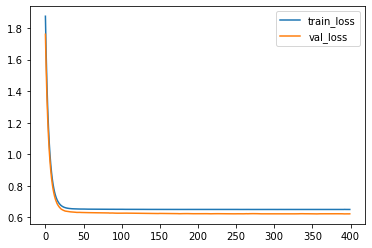

In [8]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

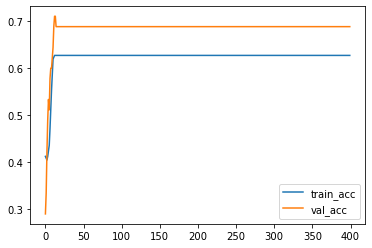

In [9]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

You may compare what we get here with the codes we get before.